# Visualisation of the last recording signals and Band Power energy

In [1]:
%load_ext autoreload
%autoreload 2

from BandPower import *
import glob 
import os 
list_of_files = glob.glob('../DATA/*') # * means all if need specific format then *.csv 
latest_file = max(list_of_files, key=os.path.getctime)
latest_smell = max(glob.glob(latest_file+'/*'),key=os.path.getctime)
#latest_smell = '../DATA/subject_17/smell 1.csv'

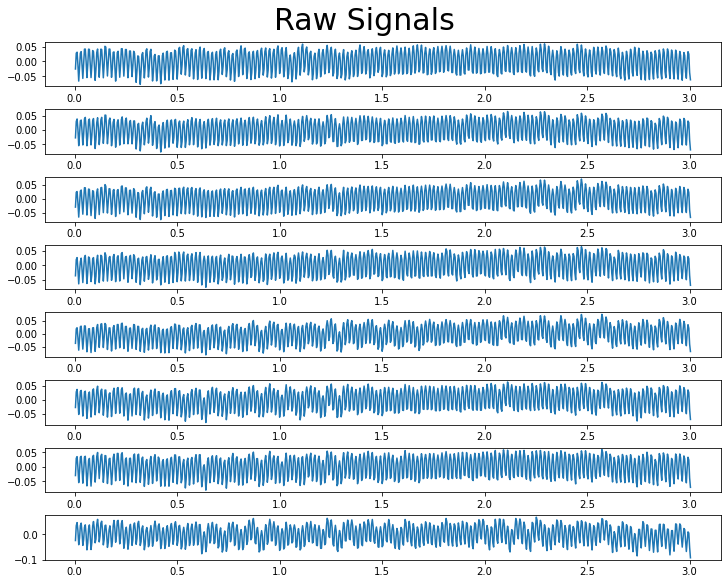

In [2]:
df = pd.read_csv(latest_smell)
plot_raw_signal(df)

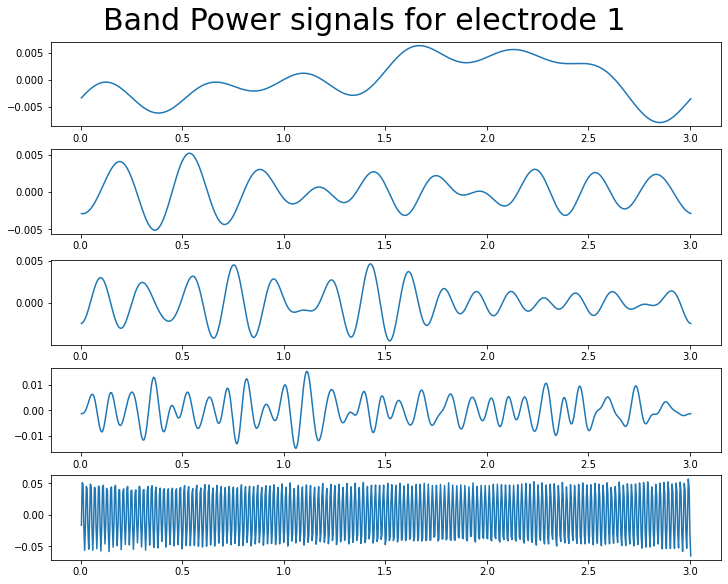

In [3]:
BPS = toBandPower(df)
plot_bandPower_signal(BPS,df,electrode = 1)

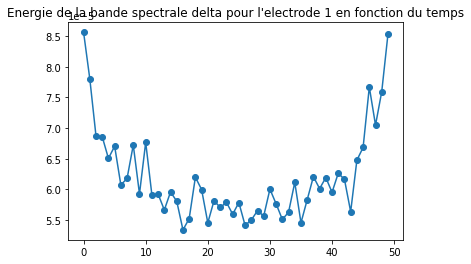

In [4]:
BPVE=BP_varying_energy(BPS,df,nb_samples=50)
plt.plot(BPVE[5][4],'-o')
plt.title("Energie de la bande spectrale delta pour l'electrode 1 en fonction du temps")
plt.show()

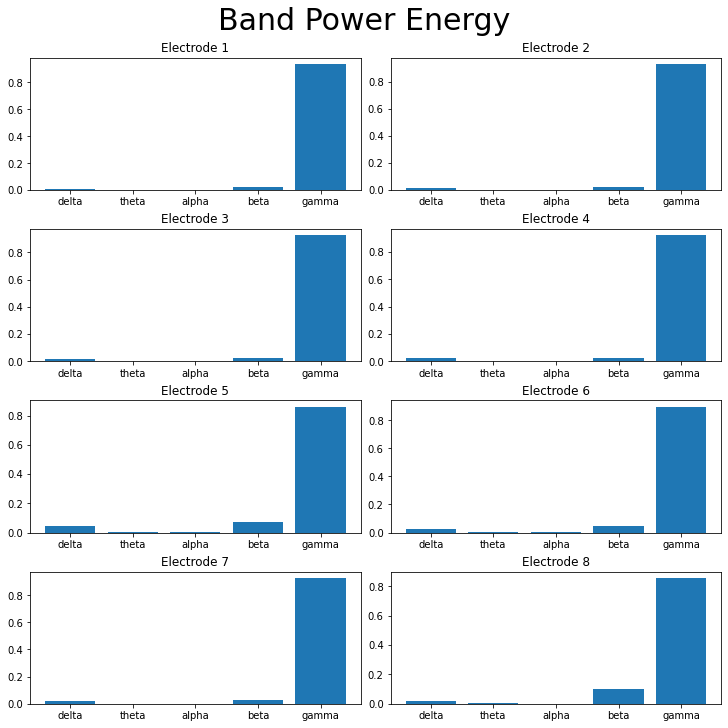

In [5]:

BPEnergy = get_BPEnergy(BPS,df)
plot_bandPower_energy(BPEnergy)

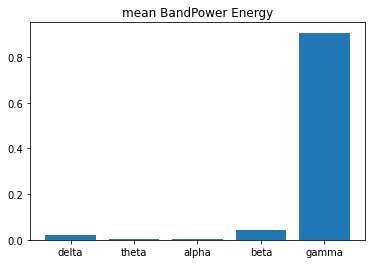

In [6]:
M = meanEnergy(BPEnergy)
plt.bar(range(5),height = M,tick_label=['delta','theta','alpha','beta','gamma'])
plt.title('mean BandPower Energy')
plt.show()

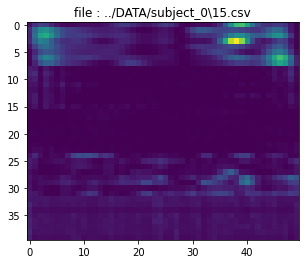

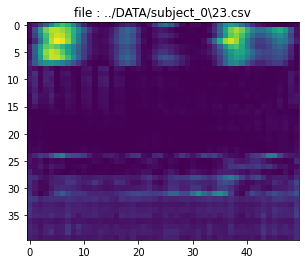

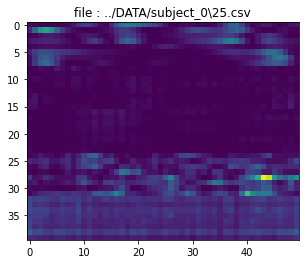

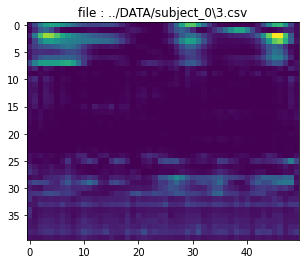

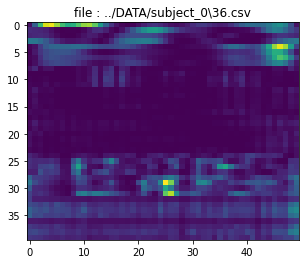

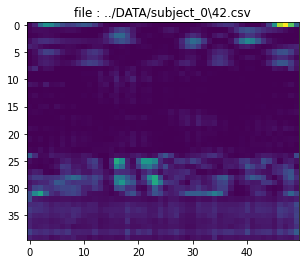

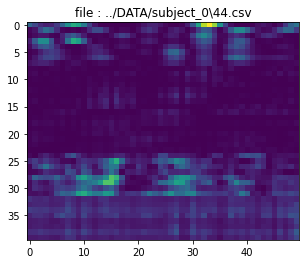

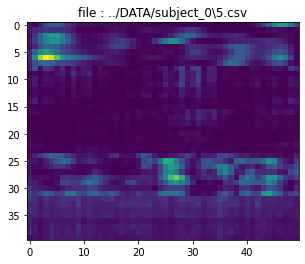

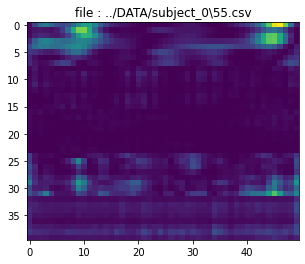

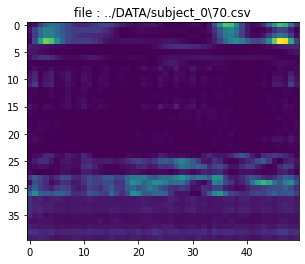

In [7]:
nb_samples = 50

## Signal to simple image
for file in glob.glob('../DATA/subject_0/*'):
    data = pd.read_csv(file)
    PowerSpectrum = toBandPower(data)
    VE = BP_varying_energy(PowerSpectrum,data,nb_samples)
    nb_elec,nb_waves,nb_samples = VE.shape
    img = np.zeros((nb_elec*nb_waves,nb_samples))
    for i in range(nb_elec):
        for j in range(nb_waves):
            img[i+j*nb_elec] = VE[i][j]
    plt.imshow(img)
    plt.title('file : ' + str(file))
    plt.show()

In [8]:
def make_img_from_ve(BPVE,wave):
    ve = BPVE[:,wave,:]
    Grid = np.array([[0, 1, 0],
            [2, 3, 4],
            [6, 5, 8],
            [0, 7, 0]])
    
    IMGS = np.zeros((len(ve[0]),len(Grid),len(Grid[0])))
    for i in range(8):
        x,y = np.where(Grid==i+1)
        IMGS[:,x[0],y[0]] = ve[i][:]
    return IMGS

from IPython.display import HTML
import matplotlib.animation as animation

%matplotlib notebook

IMGS = make_img_from_ve(BPVE,2)

frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(IMGS)):
    frames.append([plt.imshow(IMGS[i],animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('theta_waves.mp4')

<IPython.core.display.Javascript object>